<a href="https://colab.research.google.com/github/gayathri12345/Deep-Learning-RNN-Notes/blob/main/MNIST_Image_classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
x_train,x_test=x_train/255.0,x_test/255.0

In [18]:
#BUild the model
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Flatten(input_shape=(28,28)),
                                  tf.keras.layers.Dense(128, activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(10,activation='softmax')

])

In [19]:
#compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
#model training
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,verbose=1)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4837 - accuracy: 0.8583 - val_loss: 0.1366 - val_accuracy: 0.9608
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1520 - accuracy: 0.9542 - val_loss: 0.1080 - val_accuracy: 0.9688
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1056 - accuracy: 0.9684 - val_loss: 0.0873 - val_accuracy: 0.9733
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0851 - accuracy: 0.9730 - val_loss: 0.0751 - val_accuracy: 0.9762
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0742 - accuracy: 0.9760 - val_loss: 0.0697 - val_accuracy: 0.9788
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0645 - accuracy: 0.9797 - val_loss: 0.0732 - val_accuracy: 0.9776
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0533 - accuracy: 0.9828 - val_loss: 0.0668 - val_accuracy:

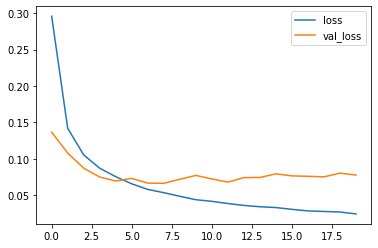

In [21]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

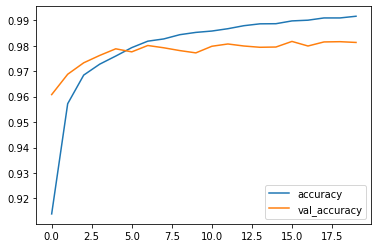

In [22]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [23]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0778 - accuracy: 0.9813


[0.07782568782567978, 0.9812999963760376]

In [33]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test).argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [34]:
confusion_matrix(y_test,y_pred)

array([[ 970,    1,    0,    0,    1,    1,    3,    1,    2,    1],
       [   0, 1127,    1,    0,    0,    0,    3,    1,    3,    0],
       [   1,    1, 1015,    1,    1,    0,    1,    8,    3,    1],
       [   0,    0,    6,  983,    0,    6,    0,    6,    4,    5],
       [   0,    0,    3,    0,  961,    0,    4,    2,    1,   11],
       [   2,    0,    0,    7,    2,  876,    2,    1,    1,    1],
       [   3,    2,    0,    1,    2,    1,  947,    0,    2,    0],
       [   0,    3,    9,    2,    0,    0,    0, 1010,    1,    3],
       [   4,    0,    1,    3,    5,    5,    2,    4,  949,    1],
       [   1,    3,    0,    6,    8,    3,    2,   10,    1,  975]])

Text(0.5, 1.0, 'True label: 3 Predicted : 5')

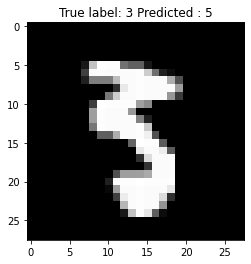

In [46]:
import numpy as np
misclassified_idx=np.where(y_pred!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: {} Predicted : {}".format(y_test[i],y_pred[i]))
